Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:
- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- ApplicantIncome
- CoapplicantIncome
- Loan_Amount
- Loan_Amount_Term
- Credit History
- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [142]:
#Imoporting neccecory Libraries:

#common lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preprocessing lib:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#outliers lib:
from scipy import stats

#multicolliniarity lib:
from sklearn.feature_selection import SelectKBest,f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score

#Model building lib 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

#model evaluation lib:
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,confusion_matrix,plot_roc_curve

#model hyper parameter tuning lib:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [279]:
#Loading the Dataset:
df=pd.read_csv('Loan Application Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [280]:
#diplay all the rows from the df
pd.set_option('display.max_rows',None)

In [221]:
df.shape
#there is 614 rows and 13 columns is availble in the data

(614, 13)

In [222]:
df.info()
#the dataframe having the object,int and float datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [100]:
#checking null value from the dataframe
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#there are multiple features which having the null values
#Gender(Mode),Married(Mode),Dependents(mode),Self_Employed(Mode),LoanAmount(Midean),Loan_Amount_Term(median),Credit_History(mode)              

In [281]:
#Fillinf the null values:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [282]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [283]:
#Replacing the 3+ with most common value as it will create the conversion error.
df['Dependents']=df['Dependents'].replace('3+','0')

In [284]:
df['Dependents'].value_counts()

0    411
1    102
2    101
Name: Dependents, dtype: int64

In [285]:
#checking null value again from the dataframe
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

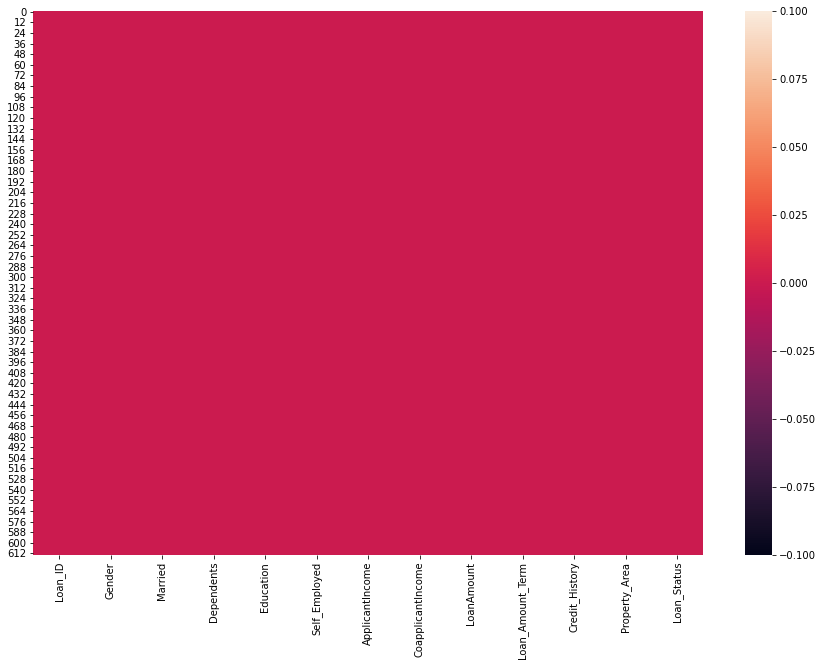

In [286]:
#there is no null value available in the dataframe.cross checking the same with the heatmap.
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())
plt.show()

In [66]:
#Discribing the dataframe
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
#from the discribe we can see that there is diffrence between mean and median(50%) so there is outliers are available in dataset.
#the standerd daviation is also looks abnormal here.

In [287]:
#using label transfrom to convert catagorical data in to binary data
lb=LabelEncoder()
cat_var=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

for i in cat_var:
    df[i]=lb.fit_transform(df[i])

In [288]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [289]:
df['Loan_ID'].value_counts()

LP002983    1
LP002959    1
LP001743    1
LP002606    1
LP001404    1
LP001473    1
LP002788    1
LP002626    1
LP002116    1
LP002948    1
LP001657    1
LP002137    1
LP001776    1
LP001883    1
LP002067    1
LP002892    1
LP001715    1
LP002784    1
LP002106    1
LP002300    1
LP002898    1
LP001488    1
LP002624    1
LP002178    1
LP001726    1
LP001964    1
LP002112    1
LP001003    1
LP002101    1
LP002794    1
LP002035    1
LP002422    1
LP001594    1
LP002297    1
LP001579    1
LP001716    1
LP001841    1
LP002625    1
LP001945    1
LP001316    1
LP002190    1
LP001225    1
LP001508    1
LP001528    1
LP001870    1
LP001938    1
LP001401    1
LP002408    1
LP002739    1
LP002478    1
LP002524    1
LP001155    1
LP001720    1
LP001024    1
LP001922    1
LP002732    1
LP002767    1
LP002640    1
LP002582    1
LP002449    1
LP002234    1
LP002140    1
LP002729    1
LP001734    1
LP001888    1
LP001993    1
LP002689    1
LP001682    1
LP002370    1
LP001640    1
LP001688    1
LP0015

In [290]:
#Dropping the feature Loan_ID as checked with the feature also but there is no effect on accuracy and the columns is also incressed to 628. 
df=df.drop(columns=['Loan_ID'],axis=1)

In [291]:
#using get dummies method to perform the encoding.
df=pd.get_dummies(df,columns=['Property_Area'])

In [292]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_0,Property_Area_1,Property_Area_2
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1


In [278]:
#checking the new shape
df.shape
#the new shape is 614 rows and 14 columns

(577, 14)

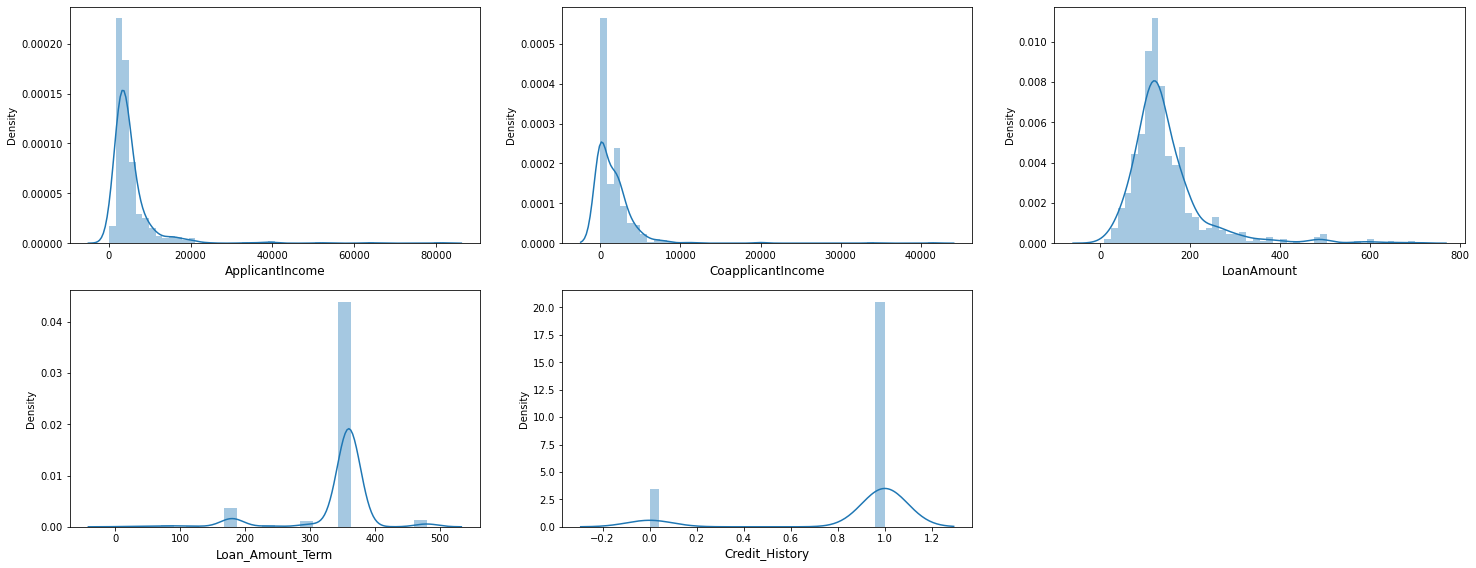

In [206]:
#checking the data distrubution using the distribution plot.
plt.figure(figsize=(25,20),facecolor='white')
pltnum=1

for column in df.iloc[:,[5,6,7,8,9]]:
    if pltnum <= 12:
        plt.subplot(4,3,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=12)
        
    pltnum +=1
plt.show()    

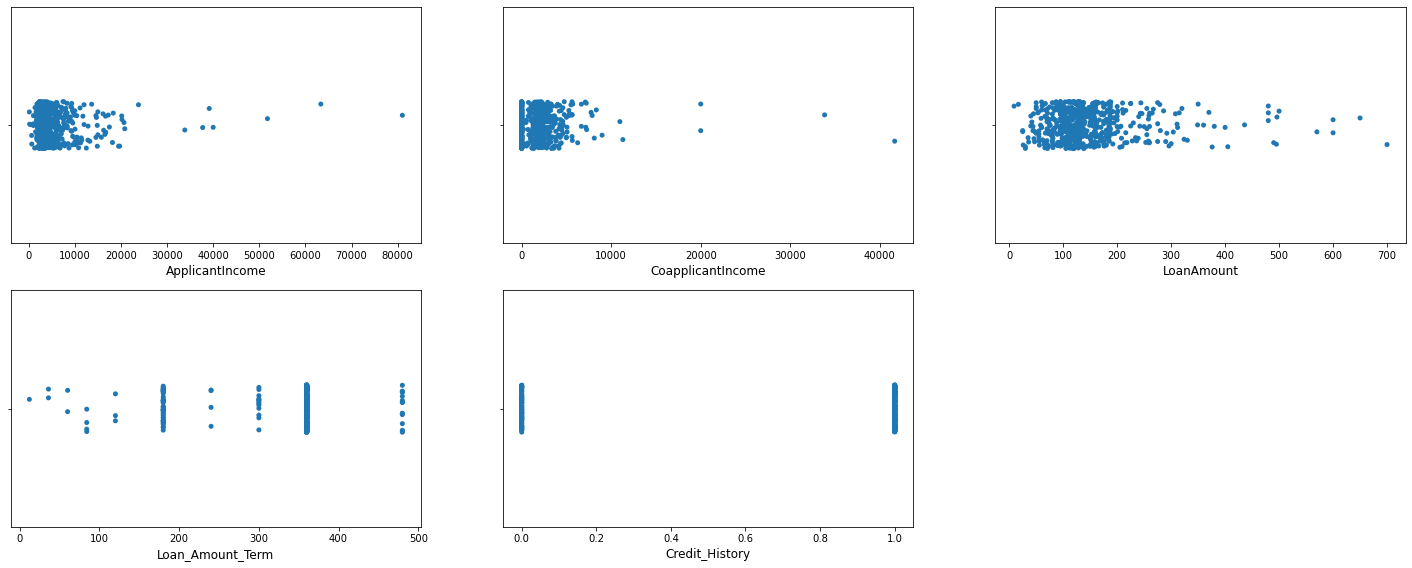

In [293]:
#checking the data distrubution using the Strip plot.
plt.figure(figsize=(25,20),facecolor='white')
pltnum=1

for column in df.iloc[:,[5,6,7,8,9]]:
    if pltnum <= 12:
        plt.subplot(4,3,pltnum)
        sns.stripplot(df[column])
        plt.xlabel(column,fontsize=12)
        
    pltnum +=1
plt.show()    

In [22]:
#there is outliers present in all the features.
#using the box plot to check the outliers.

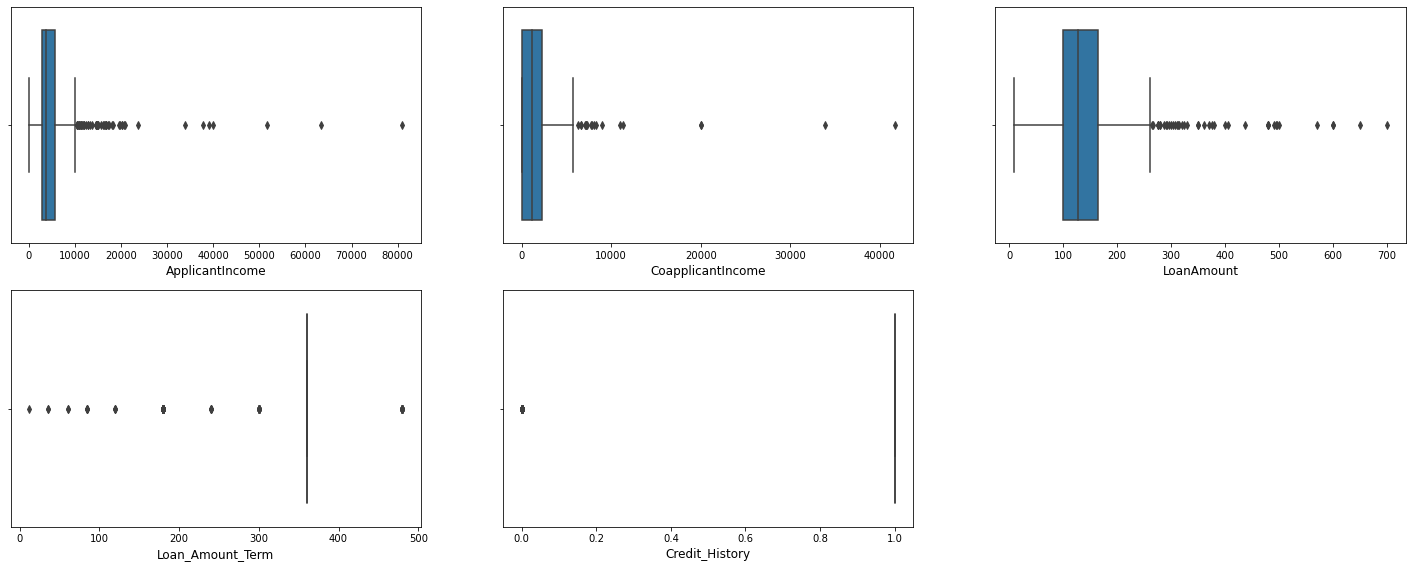

In [207]:
#using box plot to check the outliers in the feature.
plt.figure(figsize=(25,20),facecolor='white')
pltnum=1

for column in df.iloc[:,[5,6,7,8,9]]:
    if pltnum <= 12:
        plt.subplot(4,3,pltnum)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=12)
        
    pltnum +=1
plt.show()    

In [ ]:
#There is outliers present in all the features.

In [295]:
#using the z-score to check the outliers.
z=np.abs(stats.zscore(df.iloc[:,[5,6,7,8,9]]))
index=np.where(z>3)[0]

In [296]:
len(index)

41

In [297]:
#dropping the outlier index
df=df.drop(df.index[index])

In [298]:
#checking the new shape
df.shape

(577, 14)

In [299]:
#Data Loss
loss_percentage=(614-577)/614*100
print(loss_percentage)

6.026058631921824


In [ ]:
#the data loss is only 6.02 so it is ok as data loss in less then 7%

In [161]:
#q1=df.iloc[:,[5,6,7,8,9]].quantile(0.25)
#q3=df.iloc[:,[5,6,7,8,9]].quantile(0.75)
#iqr=q3-q1

In [162]:
#for column in df.iloc[:,[5,6,7]]:
#    index1=np.where(df[column] > (q3[column] + (1.5 * iqr[column])))
    
#for column in df.iloc[:,[8,9]]:
#    index1=np.where(df[column] < (q3[column] - (1.5 * iqr[column])))    

In [294]:
#index1

In [164]:
#dropping the outlier index
#df=df.drop(df.index[index1])

In [300]:
#checking the new shape
#df.shape

In [301]:
#Data Loss
#loss_percentage=(614-525)/614*100
#print(loss_percentage)

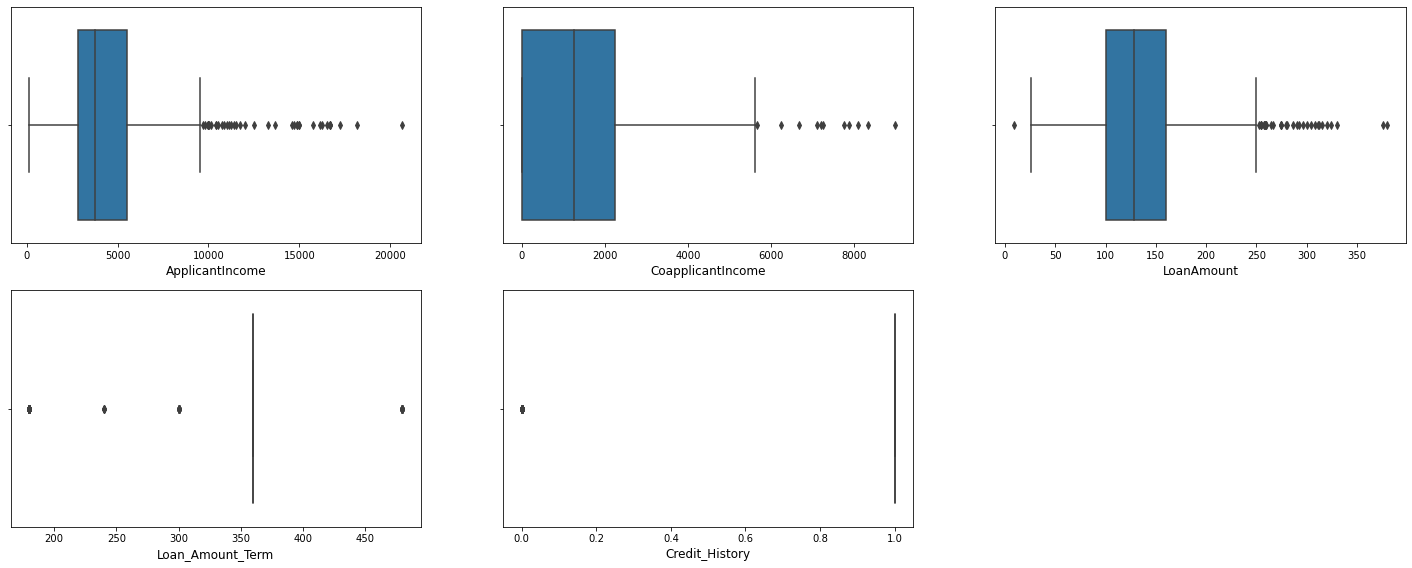

In [302]:
#using box plot to check the outliers in the feature.
plt.figure(figsize=(25,20),facecolor='white')
pltnum=1

for column in df.iloc[:,[5,6,7,8,9]]:
    if pltnum <= 12:
        plt.subplot(4,3,pltnum)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=12)
        
    pltnum +=1
plt.show()    

In [303]:
#checking the skewness and correlation between the featues and labels
df_corr=df.iloc[:,[5,6,7,8,9,10]].corr()
df_corr['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
CoapplicantIncome    0.045009
ApplicantIncome     -0.005003
Loan_Amount_Term    -0.020291
LoanAmount          -0.030169
Name: Loan_Status, dtype: float64

In [ ]:
#the is skweness available in the featues Credit_History.so using the power transformation to remove the skweness from the features.

In [304]:
#saving the Credit_History features
df_val=['Credit_History']
feature=df[df_val]

In [305]:
#performing the powertransformation to remove skweness from the column
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [306]:
#replacing the Credit_History value with the power transformed value
df['Credit_History'] = scaler.fit_transform(feature.values)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_0,Property_Area_1,Property_Area_2
0,1,0,0,0,0,5849,0.0,128.0,360.0,0.418513,1,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,0.418513,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,0.418513,1,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,0.418513,1,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,0.418513,1,0,0,1


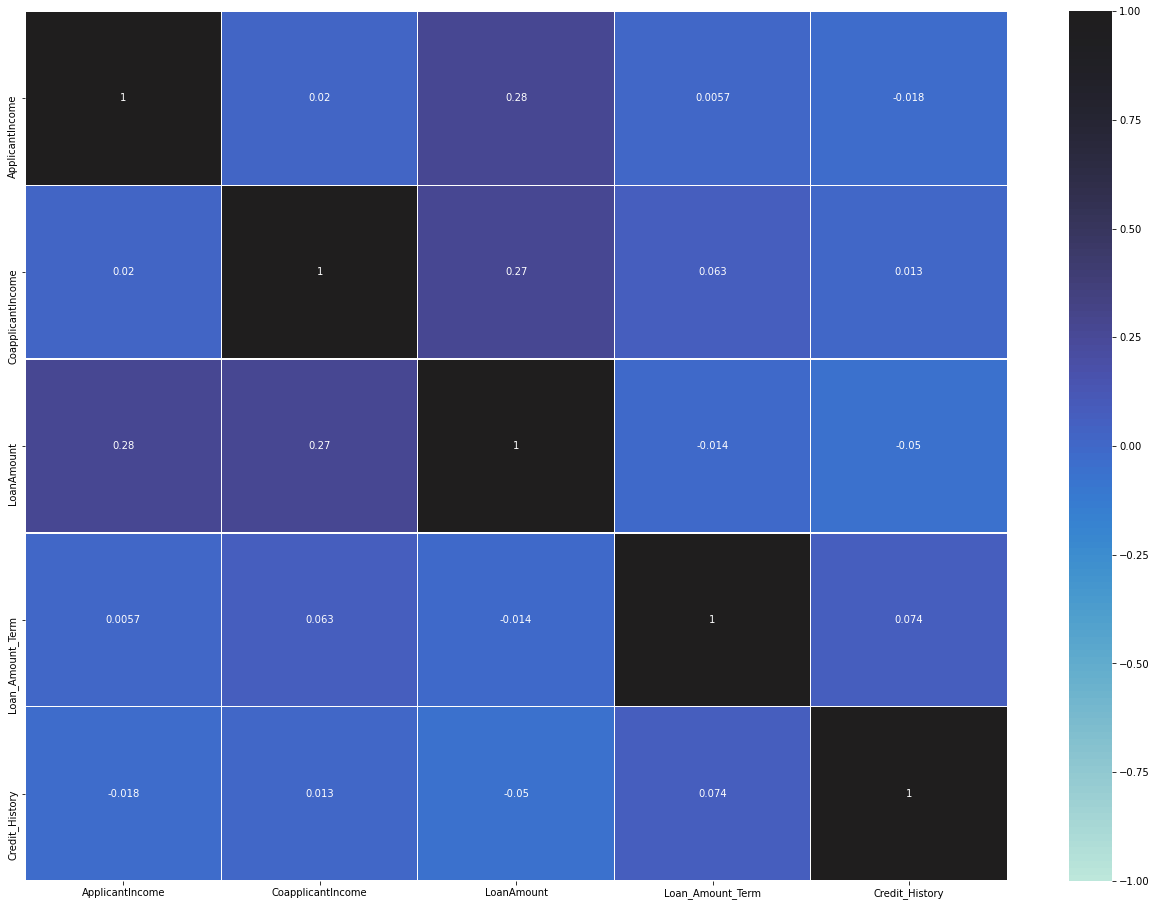

In [307]:
#using the heatmap to check the correlation between features.
corr_matrix=df1.iloc[:,[5,6,7,8,9]].abs().corr()

plt.figure(figsize=(22,16))

sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=True,annot=True, fmt='.2g',linewidths=0.1)
plt.show()

#as we can see in heatmap there is no correlation between the features and labels

In [ ]:
#from the heatmap,there is no multicollinearity issue betwenn the features.
#cross check the same with the VIF.

In [308]:
data_var=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
features=df[data_var]

In [309]:
#using the standerd scalar for scaling the data
scalar=StandardScaler()
x_data=scalar.fit_transform(features.values)

In [310]:
#assigning the  scaled data to features
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]=x_data

In [311]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_0,Property_Area_1,Property_Area_2
0,1,0,0,0,0,0.399266,-0.861036,-0.130895,0.230853,0.418513,1,0,0,1
1,1,1,1,0,0,-0.028020,0.052840,-0.130895,0.230853,0.418513,0,1,0,0
2,1,1,0,0,1,-0.562297,-0.861036,-1.235554,0.230853,0.418513,1,0,0,1
3,1,1,0,1,0,-0.703039,0.567956,-0.273432,0.230853,0.418513,1,0,0,1
4,1,0,0,0,0,0.450230,-0.861036,0.100727,0.230853,0.418513,1,0,0,1


In [312]:
df1=df.iloc[:,[5,6,7,8,9]]
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.399266,-0.861036,-0.130895,0.230853,0.418513
1,-0.028020,0.052840,-0.130895,0.230853,0.418513
2,-0.562297,-0.861036,-1.235554,0.230853,0.418513
3,-0.703039,0.567956,-0.273432,0.230853,0.418513
4,0.450230,-0.861036,0.100727,0.230853,0.418513


In [313]:
#checking feature colliniarity using VIF
vif=pd.DataFrame()
vif['features']=df1.columns
vif['vif score']=[variance_inflation_factor(x_data,i) for i in range(x_data.shape[1])]
vif

,features,vif score
0,ApplicantIncome,1.528906
1,CoapplicantIncome,1.364665
2,LoanAmount,1.608426
3,Loan_Amount_Term,1.022980
4,Credit_History,1.002311


In [ ]:
#as we can see that there is no multicolliniarity issue between the features as the vif score is below 5.

In [314]:
#now sepraating the independent features and target
x=df.drop(columns='Loan_Status',axis=1)
y=df['Loan_Status']

In [315]:
#now checking the imbalanced problem of the target column.
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

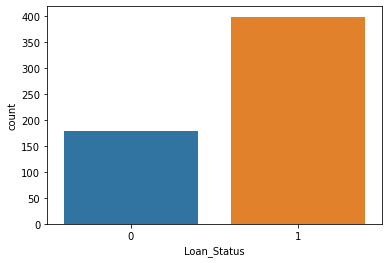

In [316]:
#plotting the count plot on target data
sns.countplot(x='Loan_Status',data=df)
plt.show()

In [ ]:
#here issue of class imbalanced problem is present as 0 has 179 count and 1 has only 398 count.

In [317]:
#handling class imbalanced problem by oversampling the minority class using SMOTE:
from imblearn.over_sampling import SMOTE

In [318]:
#using the SMOTE to solve the imbalanced problem
SM=SMOTE()
x_fit,y_fit=SM.fit_resample(x,y)

In [319]:
#new the issue of class imbalanced problem has been solved.
y_fit.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [320]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_fit,y_fit,test_size=0.25,random_state=i)
    dt=LogisticRegression()
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    acc_s=accuracy_score(y_test,y_pred)
    if acc_s > maxAcc:
        maxAcc=acc_s
        maxRs=i
        
print(f"Best Accuracy is : {maxAcc* 100:.2f}%")
print("The Best Random State is :",maxRs)

Best Accuracy is : 83.42%
The Best Random State is : 68


In [321]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x_fit,y_fit,test_size=0.25,random_state=68)

In [322]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)

print('\n==========Outputs of Logistics Reggression===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predlr)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predlr,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predlr))


==========Outputs of Logistics Reggression===========

==========Accuracy Score===========
Accuracy Score is : 83.42%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.86      0.70      0.78        81
           1       0.82      0.92      0.87       118

    accuracy                           0.83       199
   macro avg       0.84      0.81      0.82       199
weighted avg       0.84      0.83      0.83       199
 

=========Confusion Matrix============
[[ 57  24]
 [  9 109]]


In [323]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)

print('\n==========Outputs of DT===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_preddt)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_preddt,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_preddt))


==========Outputs of DT===========

==========Accuracy Score===========
Accuracy Score is : 78.39%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.72      0.77      0.74        81
           1       0.83      0.80      0.81       118

    accuracy                           0.78       199
   macro avg       0.78      0.78      0.78       199
weighted avg       0.79      0.78      0.78       199
 

=========Confusion Matrix============
[[62 19]
 [24 94]]


In [324]:
#Using the AdaBoostClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_predabc=abc.predict(x_test)

print('\n==========Outputs of ADA Boost===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predabc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predabc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predabc))


==========Outputs of ADA Boost===========

==========Accuracy Score===========
Accuracy Score is : 78.89%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        81
           1       0.81      0.85      0.83       118

    accuracy                           0.79       199
   macro avg       0.78      0.78      0.78       199
weighted avg       0.79      0.79      0.79       199
 

=========Confusion Matrix============
[[ 57  24]
 [ 18 100]]


In [325]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 88.44%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        81
           1       0.89      0.92      0.90       118

    accuracy                           0.88       199
   macro avg       0.88      0.88      0.88       199
weighted avg       0.88      0.88      0.88       199
 

=========Confusion Matrix============
[[ 68  13]
 [ 10 108]]


In [326]:
#Using the KNeighborsClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)

print('\n==========Outputs of KNeighborsClassifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predknn)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predknn,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predknn))


==========Outputs of KNeighborsClassifier===========

==========Accuracy Score===========
Accuracy Score is : 81.91%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        81
           1       0.87      0.82      0.84       118

    accuracy                           0.82       199
   macro avg       0.81      0.82      0.81       199
weighted avg       0.82      0.82      0.82       199
 

=========Confusion Matrix============
[[66 15]
 [21 97]]


In [327]:
#Using the SVC algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

#svc=SVC(probability=True)
svc=SVC()
svc.fit(x_train,y_train)
y_predsvc=svc.predict(x_test)

print('\n==========Outputs of SVC===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predsvc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predsvc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predsvc))


==========Outputs of SVC===========

==========Accuracy Score===========
Accuracy Score is : 83.42%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        81
           1       0.83      0.91      0.87       118

    accuracy                           0.83       199
   macro avg       0.84      0.82      0.82       199
weighted avg       0.83      0.83      0.83       199
 

=========Confusion Matrix============
[[ 59  22]
 [ 11 107]]


In [328]:
print('\n==========Cross Validation Score of Logistices Classifier===========')
cvs_lr=cross_val_score(lr,x_fit,y_fit,cv=5)
print(f"Cross validation for the Logistices Classifier is: {cvs_lr.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Random Forest Classifier===========')
cvs_rfc=cross_val_score(rfc,x_fit,y_fit,cv=5)
print(f"Cross validation for the Random Forest Classifier is: {cvs_rfc.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of Decision Tree====================')
cvs_dt=cross_val_score(dt,x_fit,y_fit,cv=5)
print(f"Cross validation for the Decision Tree is: {cvs_dt.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of AdaBoost Classifier==============')
cvs_abc=cross_val_score(abc,x_fit,y_fit,cv=5)
print(f"Cross validation for the AdaBoost Classifier is: {cvs_abc.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of KNN========================')
cvs_knn=cross_val_score(knn,x_fit,y_fit,cv=5)
print(f"Cross validation for the KNN Classifier is: {cvs_knn.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVC========================')
cvs_svc=cross_val_score(svc,x_fit,y_fit,cv=5)
print(f"Cross validation for the SVC Classifier is: {cvs_svc.mean()*100:.2f}%\n")


==========Cross Validation Score of Logistices Classifier===========
Cross validation for the Logistices Classifier is: 75.26%


==========Cross Validation Score of Random Forest Classifier===========
Cross validation for the Random Forest Classifier is: 82.05%


=============Cross Validation Score of Decision Tree====================
Cross validation for the Decision Tree is: 74.50%


=============Cross Validation Score of AdaBoost Classifier==============
Cross validation for the AdaBoost Classifier is: 74.25%


===================Cross Validation Score of KNN========================
Cross validation for the KNN Classifier is: 77.39%


===================Cross Validation Score of SVC========================
Cross validation for the SVC Classifier is: 74.25%



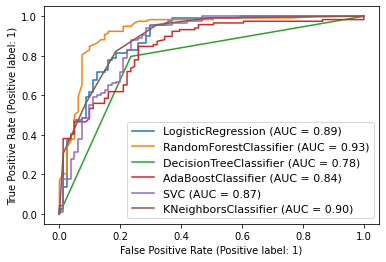

In [329]:
#Using the roc_auc_plot to the same.
dist=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=dist.ax_)#abc svc, 
plot_roc_curve(dt,x_test,y_test,ax=dist.ax_)
plot_roc_curve(abc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(svc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(knn,x_test,y_test,ax=dist.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [ ]:
#we select the Random Forest Regressor after comaparing all the models accuracy with the cross validation score.
#LR: Accuracy:83.42   cross validation score:75.26  Diffrence:8.16
#DT: Accuracy:78.39   cross validation score:74.50  Diffrence:3.89
#ADA: Accuracy:78.89   cross validation score:74.25  Diffrence:4.64
#RFC: Accuracy:88.44   cross validation score:82.05  Diffrence:6.39
#KNN: Accuracy:81.91   cross validation score:77.39  Diffrence:4.52
#SVC: Accuracy:83.42   cross validation score:74.25  Diffrence:9.17

#As we can see the Decision Tree has  least differnece so we can select it for hyper parameter tuing.

In [337]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param={'criterion':['gini','entropy'],
           'max_depth':[10,12,15,20,25,30],
           'min_samples_split':[2,3,5,7,9,11],
           'min_samples_leaf':[2,4,6,8,10,12]}

In [338]:
gridcv=GridSearchCV(dt,param_grid=best_param)

In [339]:
gridcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 20, 25, 30],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [2, 3, 5, 7, 9, 11]})

In [340]:
gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [353]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
dt=DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_leaf=6,min_samples_split=6)
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)

print('\n==========Outputs of DT===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_preddt)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_preddt,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_preddt))


==========Outputs of DT===========

==========Accuracy Score===========
Accuracy Score is : 82.41%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        81
           1       0.88      0.81      0.85       118

    accuracy                           0.82       199
   macro avg       0.82      0.83      0.82       199
weighted avg       0.83      0.82      0.83       199
 

=========Confusion Matrix============
[[68 13]
 [22 96]]


In [ ]:
#the accuracy has been incressed to 82.41% so we are saving the model.

In [ ]:
#Saving the Decision Tree claasifier as the final model.

In [354]:
#Saving the model
import joblib
joblib.dump(dt,'Loan_Application_Model.pkl')

['Loan_Application_Model.pkl']

In [ ]:
#This will complete the model building.